## Installing Dependencies

In [65]:
# Install Neural Prophet
!pip install neuralprophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Preprocessing
- Keeping only the Date and AQI columns

In [66]:
df = pd.read_csv('/content/Nizamabad.csv')

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      613 non-null    object 
 1   max_temp  613 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.4+ KB


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      613 non-null    object 
 1   max_temp  613 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.4+ KB


In [68]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      613 non-null    datetime64[ns]
 1   y       613 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.4 KB


## Normalising the data - MinMax Scaling

In [69]:
# Data normalisation - Change the AQI into 0-1 MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = df['y'].values.reshape(-1, 1)
# fit the scaler to the data and transform it
scaled_values = scaler.fit_transform(values)
# assign the transformed data to the original column
df['y'] = scaled_values 

In [70]:
# Save the scaler values for forecast later
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

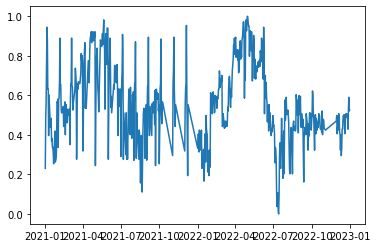

In [71]:
plt.plot(df['ds'], df['y'])
plt.show()

In [72]:
df

,ds,y
0,2021-01-01,0.230415
1,2021-01-02,0.483871
2,2021-01-03,0.566820
3,2021-01-04,0.774194
4,2021-01-05,0.944700
...,...,...
608,2022-12-27,0.428571
609,2022-12-28,0.525346
610,2022-12-29,0.589862
611,2022-12-30,0.520737


In [73]:
#define the model and parameters
from neuralprophet import NeuralProphet
m = NeuralProphet(
    n_changepoints=100,
    trend_reg=4,
    yearly_seasonality=4,
    weekly_seasonality=False,
    daily_seasonality=False,

)
#metrics = m.fit(df, freq="D")
#forecast = m.predict(df)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.553% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.553% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.687% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.687% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is e

Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

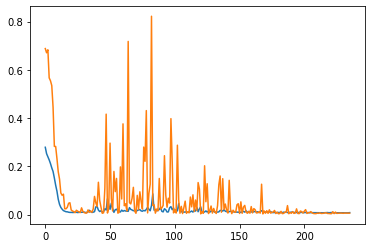

In [74]:
# Train-Test Split and,Train the model
df_train, df_test = m.split_df(df, freq="D", valid_p=1.0 / 12)
metrics = m.fit(df_train, freq="D", validation_df=df_test, progress="plot")

In [75]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
235,0.073888,0.099658,0.006028,0.0,235,0.10155,0.131062,0.008122,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.687% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.687% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.687% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.687% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


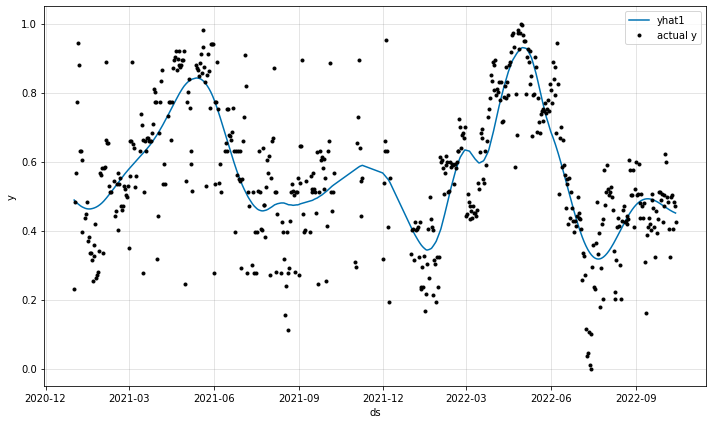

In [78]:
forecast_train = m.predict(df_train)
fig = m.plot(forecast_train)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.118% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.118% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.118% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.118% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


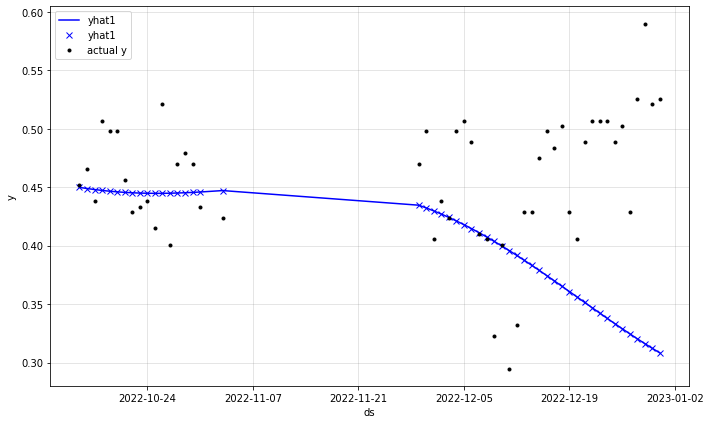

In [79]:
forecast_test = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_test[-7 * 24 :])

In [80]:
df_test
t1_actual = scaler.inverse_transform([df_test['y']])
print(t1_actual)

[[33.3 33.6 33.  34.5 34.3 34.3 33.4 32.8 32.9 33.  32.5 34.8 32.2 33.7
  33.9 33.7 32.9 32.7 33.7 34.3 32.3 33.  32.7 34.3 34.5 34.1 32.4 32.3
  30.5 32.2 29.9 30.7 32.8 32.8 33.8 34.3 34.  34.4 32.8 32.3 34.1 34.5
  34.5 34.5 34.1 34.4 32.8 34.9 36.3 34.8 34.9]]


In [81]:
#forecast
t1_pred= scaler.inverse_transform([forecast_test['yhat1']])
print(t1_pred)

[[33.26155407 33.24052434 33.2217277  33.20519002 33.19092036 33.1789103
  33.16912945 33.16153384 33.15606138 33.15263252 33.1511509  33.15150595
  33.15357154 33.15720864 33.16226333 33.16857005 33.17595225 33.20263293
  32.93135473 32.88028401 32.82548436 32.76699717 32.70488128 32.63921172
  32.57008161 32.4976009  32.42189892 32.34311731 32.26141579 32.17696835
  32.08996446 32.0006059  31.90910608 31.81569394 31.72060423 31.62408658
  31.52639515 31.42779381 31.32855222 31.22894588 31.12925418 31.02975779
  30.9307419  30.83248913 30.73528467 30.63940727 30.5451363  30.45274337
  30.36249817 30.27465937 30.1894805 ]]


In [82]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(t1_actual, t1_pred) #transformed values

0.04715859771033084

In [83]:
mean_absolute_percentage_error(df_test['y'], forecast_test['yhat1'])

0.1549555596308566

In [84]:
print(len(t1_actual[0]), len(t1_pred[0]))

51 51


In [85]:
# Compare the predicted value vs actual value
data = {'actual': t1_actual[0], 'prediction': t1_pred[0]}
# create a DataFrame from the dictionary
df1 = pd.DataFrame(data)

WARNING - (NP.forecaster.plot_parameters) - highlight_forecast_step_n is ignored since autoregression not enabled.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


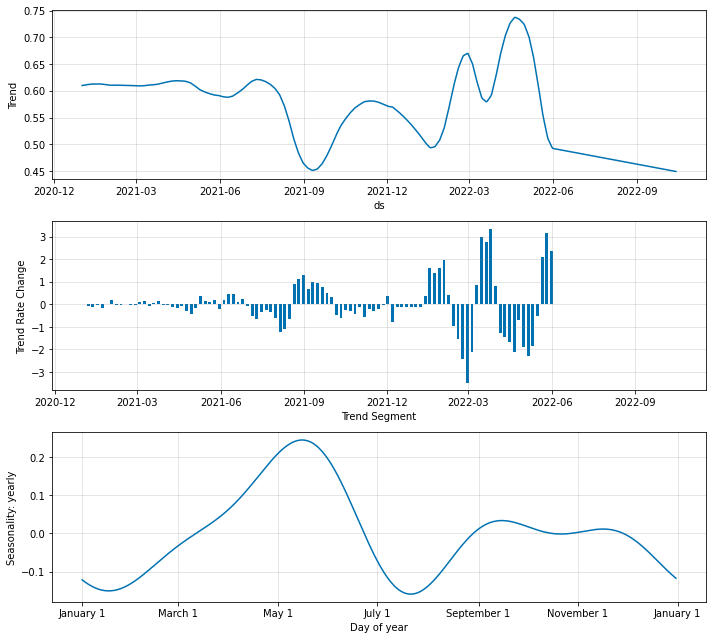

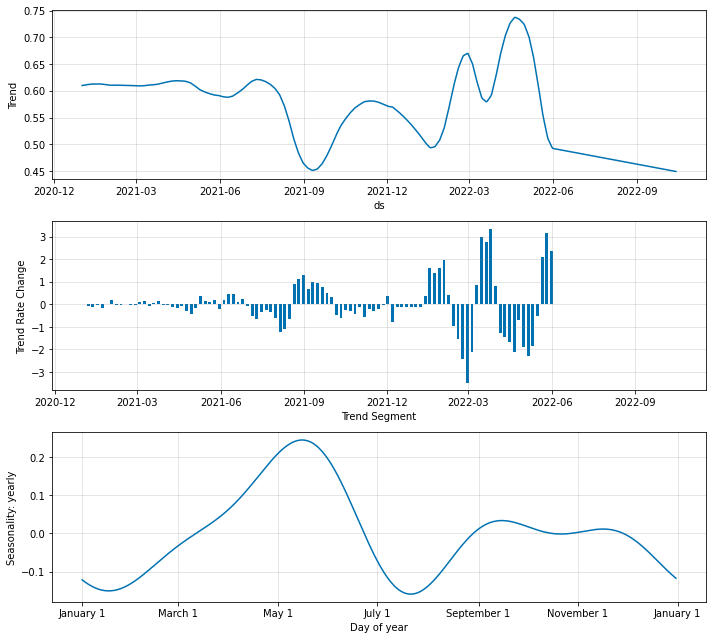

In [97]:
m.plot_parameters()

In [86]:
df = pd.read_csv('/content/NizamabadNorth22.csv')
df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      338 non-null    datetime64[ns]
 1   y       338 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [87]:
import pickle
pkl_path = "/content/model.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)



In [88]:
# Forecast for more days
future = m.make_future_dataframe(df, periods=1500)
forecast_more_years = m.predict(future)
forecast_more_years

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.112% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.112% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.304480,0.424114,-0.119634
1,2023-01-02,None,0.300833,0.423795,-0.122962
2,2023-01-03,None,0.297341,0.423476,-0.126135
3,2023-01-04,None,0.294013,0.423156,-0.129143
4,2023-01-05,None,0.290859,0.422837,-0.131978
...,...,...,...,...,...
1495,2027-02-04,None,-0.173657,-0.052969,-0.120688
1496,2027-02-05,None,-0.170846,-0.053289,-0.117558
1497,2027-02-06,None,-0.167937,-0.053608,-0.114329
1498,2027-02-07,None,-0.164940,-0.053927,-0.111013


In [89]:
# Save forecast
# save the dataframe
forecast_more_years.to_pickle("/content/forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [90]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("/content/forecast.pkl")

In [91]:
fcast

,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.304480,0.424114,-0.119634
1,2023-01-02,None,0.300833,0.423795,-0.122962
2,2023-01-03,None,0.297341,0.423476,-0.126135
3,2023-01-04,None,0.294013,0.423156,-0.129143
4,2023-01-05,None,0.290859,0.422837,-0.131978
...,...,...,...,...,...
1495,2027-02-04,None,-0.173657,-0.052969,-0.120688
1496,2027-02-05,None,-0.170846,-0.053289,-0.117558
1497,2027-02-06,None,-0.167937,-0.053608,-0.114329
1498,2027-02-07,None,-0.164940,-0.053927,-0.111013


In [92]:
extract_ds=forecast_more_years['ds']
df_extract_ds=pd.DataFrame(extract_ds)
df_extract_ds

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1495,2027-02-04
1496,2027-02-05
1497,2027-02-06
1498,2027-02-07


In [93]:
#forecast
final_forecast= scaler.inverse_transform([forecast_more_years['yhat1']])
print(final_forecast)

[[30.10720665 30.0280687  29.95229235 ... 19.85576687 19.9208046
  19.98753217]]


In [94]:
df = pd.DataFrame(final_forecast[0],)
df

,0
0,30.107207
1,30.028069
2,29.952292
3,29.880086
4,29.811649
...,...
1495,19.731637
1496,19.792639
1497,19.855767
1498,19.920805


In [95]:
merged_df = pd.concat([df_extract_ds,df], axis=1)
merged_df

,ds,0
0,2023-01-01,30.107207
1,2023-01-02,30.028069
2,2023-01-03,29.952292
3,2023-01-04,29.880086
4,2023-01-05,29.811649
...,...,...
1495,2027-02-04,19.731637
1496,2027-02-05,19.792639
1497,2027-02-06,19.855767
1498,2027-02-07,19.920805


In [96]:
merged_df.to_csv('/content/NizamabadMaxTpredict.csv')